In [1]:
import pandas as pd
import numpy as np
import joblib


In [5]:
src = r"E:\1_RecSys\Recommender\data\collaborative\v2\2_train_set.pkl"
df = joblib.load(src)

In [ ]:
df = df[df['userId'] == 223]
print(df.shape(0))


       userId  movieId  rating  timestamp  \
22026     223      379     4.0  971811286   
22027     223      528     5.0  971811286   
22028     223     1154     5.0  971811286   
22029     223      676     5.0  971811594   
22030     223      826     1.0  971811594   
22031     223      519     5.0  971811884   
22032     223      822     5.0  971811884   
22033     223     1018     5.0  971811884   
22034     223     1042     5.0  971811884   
22035     223      558     5.0  971811933   
22036     223      593     5.0  971811933   
22037     223      827     5.0  971811933   
22038     223     1008     5.0  971811933   
22039     223     1014     5.0  971811933   
22040     223     1165     4.0  971811933   
22041     223      987     4.0  971811973   
22042     223     1122     4.0  971811973   
22043     223      541     1.0  971812094   
22044     223      792     5.0  971812094   
22045     223      837     5.0  971812094   
22046     223     1089     5.0  971812094   
22047     

In [ ]:
# print(user_item_matrix)
specific_tmdb_id = 22  # Replace with the TMDB ID you want to check

if specific_tmdb_id in user_item_matrix:
    movie_id = user_item_matrix[specific_tmdb_id]
    print(f"TMDB ID {specific_tmdb_id} maps to Movie ID: {movie_id}")
else:
    print(f"TMDB ID {specific_tmdb_id} not found in the dictionary.")

Matrix shape: (610, 2269)
Matrix type: <class 'scipy.sparse._csr.csr_matrix'>
Matrix non-zeros: 64660
Matrix sparsity: 0.046717
Found 0 empty items at indices: []


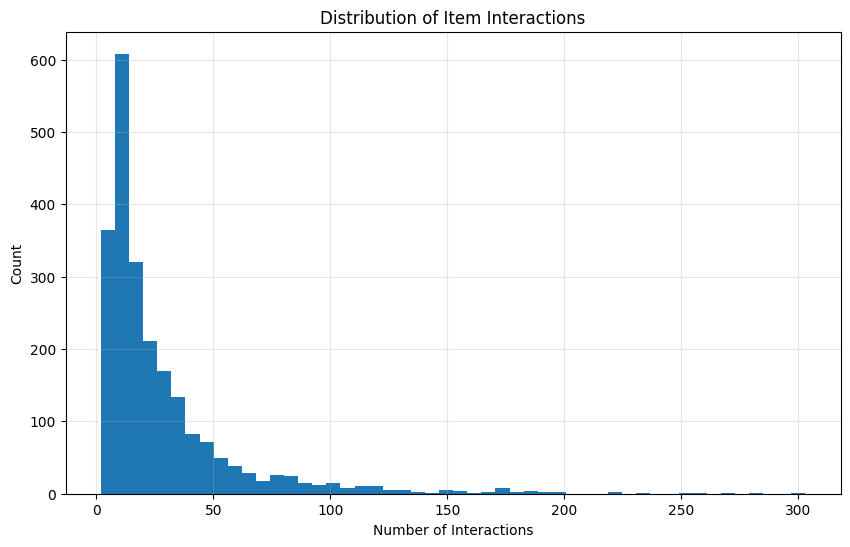

In [14]:
# Print basic information
from matplotlib import pyplot as plt


print(f"Matrix shape: {user_item_matrix.shape}")
print(f"Matrix type: {type(user_item_matrix)}")
print(f"Matrix non-zeros: {user_item_matrix.nnz}")
print(f"Matrix sparsity: {user_item_matrix.nnz / (user_item_matrix.shape[0] * user_item_matrix.shape[1]):.6f}")

# Convert to CSC format for efficient column operations
matrix_csc = user_item_matrix.tocsc()

# Count non-zeros in each column (item)
item_interaction_counts = np.diff(matrix_csc.indptr)

# Find empty items (columns with all zeros)
empty_item_indices = np.where(item_interaction_counts == 0)[0]

print(f"Found {len(empty_item_indices)} empty items at indices: {empty_item_indices}")

# Visualize item interaction distribution
plt.figure(figsize=(10, 6))
plt.hist(item_interaction_counts, bins=50)
plt.title('Distribution of Item Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

# If empty items were found, check them against the original data if possible
if len(empty_item_indices) > 0:
    print("\nItems with no interactions:")
    for idx in empty_item_indices:
        print(f"Item ID: {idx}")
        
    # Check items with very few interactions (might be relevant)
    few_interactions = np.where((item_interaction_counts > 0) & (item_interaction_counts <= 5))[0]
    print(f"\nFound {len(few_interactions)} items with 1-5 interactions")


In [ ]:
print(arr.shape)
print(arr[:])


In [26]:
# Check rows (users) that are all zeros
nonzero_counts = arr.getnnz(axis=1)
zero_vector_users = np.where(nonzero_counts == 0)[0]

print(f"Number of users with zero vectors: {len(zero_vector_users)}")
print(f"User indices with zero vectors: {zero_vector_users}")

Number of users with zero vectors: 0
User indices with zero vectors: []


In [ ]:
# Check for zero vectors (rows where all elements are 0)
zero_vector_indices = np.where(np.all(arr == 0, axis=1))[0]

print(f"Indices of zero vectors: {zero_vector_indices}")
print(f"Number of zero vectors: {len(zero_vector_indices)}")